### Monte Carlo simulations

In [5]:
# %load imports.py
%load_ext autoreload
%autoreload 2
%reload_kedro
%config Completer.use_jedi = False  ## (To fix autocomplete)

import pandas as pd
from src.models.vmm import ModelSimulator
import matplotlib.pyplot as plt
from src.visualization.plot import track_plots, plot, captive_plot
import kedro
import numpy as np
import os.path
import anyconfig

import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,4)

from myst_nb import glue
from src.symbols import *
import src.symbols as symbols
from src.system_equations import *

from IPython.display import display, Math, Latex, Markdown
from sympy.physics.vector.printing import vpprint, vlatex

from src.parameters import df_parameters
p = df_parameters["symbol"]

# Read configs:
conf_path = os.path.join("../../conf/base/")
runs_globals_path = os.path.join(
    conf_path,
    "runs_globals.yml",
)

runs_globals = anyconfig.load(runs_globals_path)
model_test_ids = runs_globals["model_test_ids"]

join_globals_path = os.path.join(
    conf_path,
    "join_globals.yml",
)

joins = runs_globals["joins"]
join_runs_dict = anyconfig.load(join_globals_path)

globals_path = os.path.join(
    conf_path,
    "globals.yml",
)
global_variables = anyconfig.load(globals_path)



vmms = global_variables["vmms"]
only_joined = global_variables[
    "only_joined"
]  # (regress/predict with only models from joined runs)S

from src.visualization.plot import plot, track_plots, plot_parameters
ship_data = catalog.load("ship_data")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-02-09 10:43:20,565 - kedro.framework.session.store - INFO - `read()` not implemented for `SQLiteStore`. Assuming empty store.
2022-02-09 10:43:23,163 - root - INFO - ** Kedro project wPCC_pipeline
2022-02-09 10:43:23,164 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-02-09 10:43:23,173 - root - INFO - Registered line magic `run_viz`
2022-02-09 10:43:23,187 - kedro.io.data_catalog - INFO - Loading data from `ship_data` (YAMLDataSet)...


In [6]:
regressions = {}
for vmm_name in vmms:
    regressions[vmm_name] = catalog.load(f"{ vmm_name }.motion_regression.joined.regression")

2022-02-09 10:43:28,793 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.regression` (PickleDataSet)...
2022-02-09 10:43:29,120 - kedro.io.data_catalog - INFO - Loading data from `vmm_martin.motion_regression.joined.regression` (PickleDataSet)...
2022-02-09 10:43:29,261 - kedro.io.data_catalog - INFO - Loading data from `vmm_linear.motion_regression.joined.regression` (PickleDataSet)...
2022-02-09 10:43:29,366 - kedro.io.data_catalog - INFO - Loading data from `vmm_martins_simple.motion_regression.joined.regression` (PickleDataSet)...


In [31]:
fig_template = """```{{glue:figure}} {fig_name}
:figwidth: 600px
:name: "{fig_name}"

{caption}
```"""

In [33]:
print(fig_template.format(fig_name='hej', caption='hej'))

```{glue:figure} hej
:figwidth: 600px
:name: "hej"

hej
```


```{glue:figure} fig_parameters_vmm_abkowitz
:figwidth: 600px
:name: "fig_parameters_vmm_abkowitz"

Regressed parameters on vmm_abkowitz
```


```{glue:figure} fig_parameters_vmm_martin
:figwidth: 600px
:name: "fig_parameters_vmm_martin"

Regressed parameters on vmm_martin
```


```{glue:figure} fig_parameters_vmm_linear
:figwidth: 600px
:name: "fig_parameters_vmm_linear"

Regressed parameters on vmm_linear
```


```{glue:figure} fig_parameters_vmm_martins_simple
:figwidth: 600px
:name: "fig_parameters_vmm_martins_simple"

Regressed parameters on vmm_martins_simple
```


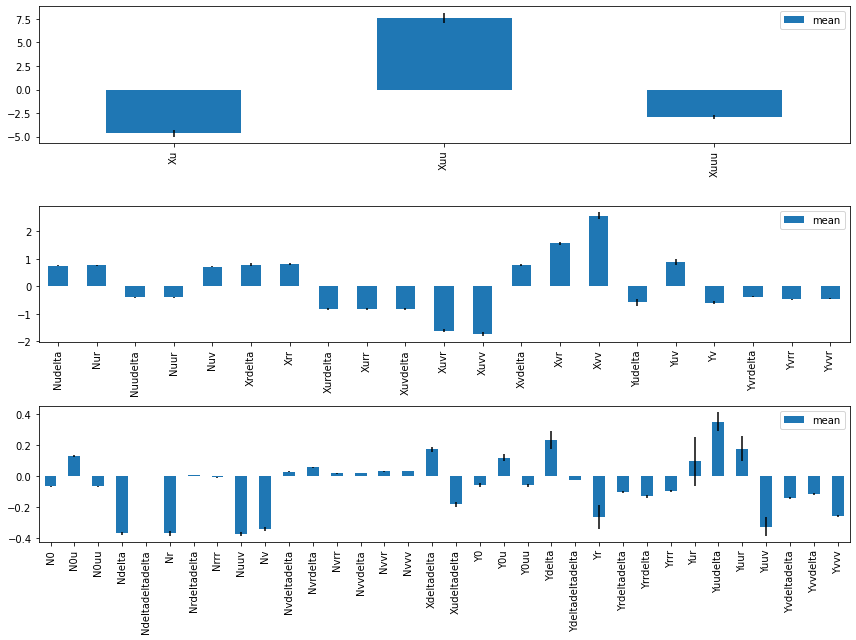

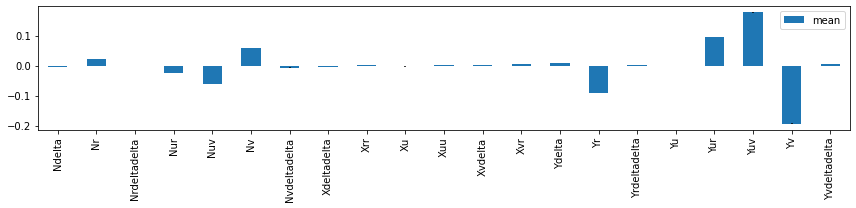

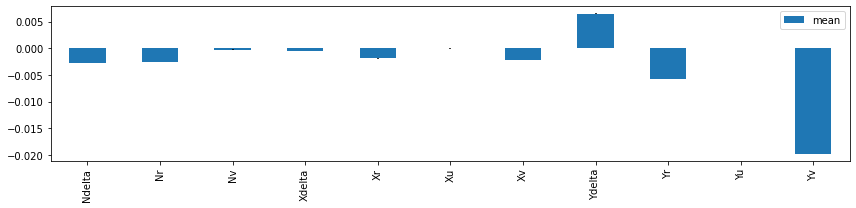

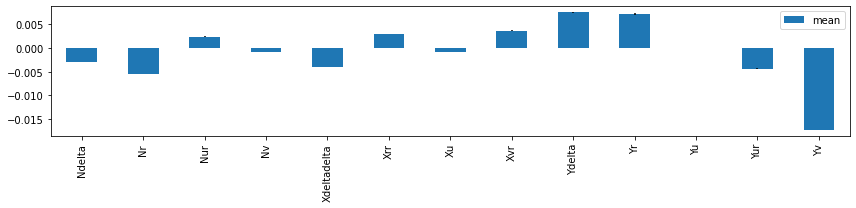

In [35]:
quantile_cuts_dict={
    'vmm_abkowitz' : [0.6, 0.95],
}

for vmm_name, regression in regressions.items():
    parameters = pd.DataFrame()
    parameters['mean'] = regression.parameters['regressed']
    parameters['std'] = regression.std
    quantile_cuts=quantile_cuts_dict.get(vmm_name,[])
    fig = plot_parameters(parameters, quantile_cuts=quantile_cuts);
    
    fig_name = f"fig_parameters_{vmm_name}"
    glue(fig_name, fig, display=False)
    
    caption = f"Regressed parameters on {vmm_name}"
    print(fig_template.format(fig_name=fig_name, caption=caption))
    
    
    

Hydrodynamic derivatives regressed on all model tests are shown for the examined VMM:s below. The Abkowitz model has a lot of parameters as seen in {numref}`fig_parameters_vmm_abkowitz`. According to the Centrall limit theorem the hydrodynamic derivatives from the OLS regression are Gausian random variables. The bar plots show the mean values of these random variables together with the standard deviation shown as the black error bars. It can be seen that the black error bars are much larger for the Abkowitz model, which means that the parameters of this model are much more uncertain.

```{glue:figure} fig_parameters_vmm_abkowitz
:figwidth: 600px
:name: "fig_parameters_vmm_abkowitz"

Regressed parameters on vmm_abkowitz
```
```{glue:figure} fig_parameters_vmm_martin
:figwidth: 600px
:name: "fig_parameters_vmm_martin"

Regressed parameters on vmm_martin
```
```{glue:figure} fig_parameters_vmm_linear
:figwidth: 600px
:name: "fig_parameters_vmm_linear"

Regressed parameters on vmm_linear
```
```{glue:figure} fig_parameters_vmm_martins_simple
:figwidth: 600px
:name: "fig_parameters_vmm_martins_simple"

Regressed parameters on vmm_martins_simple
```